# Results analysis
The following notebook shows an example for the analysis of the results of the simulations.

In [1]:
import pandas as pd

from prisk.utils import  plot_risk_factors, plot_bootstrap

components = pd.read_parquet("../../results/240617/components_insured.parquet.gzip")
components_uninsured = pd.read_parquet("../../results/240617/components_non_insured.parquet.gzip")

"""components.insurance_adjustment = 0
components_uninsured.insurance_adjustment = 0
components.prisk = (components.base_value - components.replacement - components.business_disruption - components.fair_insurance )/components.base_value
components_uninsured.prisk = (components_uninsured.base_value - components_uninsured.replacement - components_uninsured.business_disruption - components_uninsured.fair_insurance )/components_uninsured.base_value"""


'components.insurance_adjustment = 0\ncomponents_uninsured.insurance_adjustment = 0\ncomponents.prisk = (components.base_value - components.replacement - components.business_disruption - components.fair_insurance )/components.base_value\ncomponents_uninsured.prisk = (components_uninsured.base_value - components_uninsured.replacement - components_uninsured.business_disruption - components_uninsured.fair_insurance )/components_uninsured.base_value'

### Single-Asset exploration
We begin by investigating the P-RISK measure for a low exposure asset:

In [2]:
asset_name = "Kenana power station"
asset_data = components[components["asset"] == asset_name]
assert len(asset_data) == 250, "Double name"

First, we explore the distribution of the P-RISK measure for this asset. To obtain a distribution, we make use of the technique of bootstrapping.

Width of CI:  0.0144
Mean of CI:   0.953
Std of CI:    0.0044
Q1:           0.9456
Q99:          0.96
Skewness:     -0.1912
Kurtosis:     0.0066


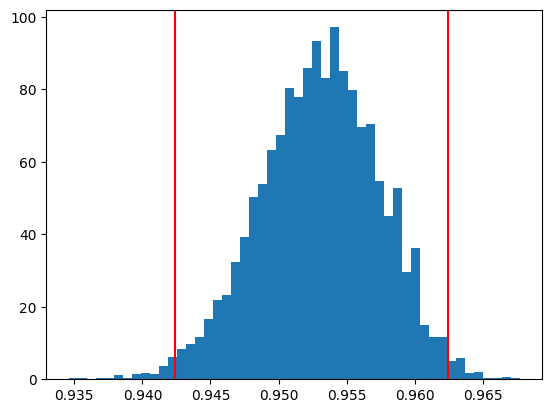

In [3]:
plot_bootstrap(asset_data, "prisk")

Then, we analyze the sources of risk for this asset:

In [4]:
plot_risk_factors(
    base_value=asset_data["base_value"].mean(),
    capital_damages=asset_data["replacement"].mean(),
    business_disruption=asset_data["business_disruption"].mean(),
    fair_premium=asset_data["fair_insurance"].mean(),
    insurance_adjustment=asset_data["insurance_adjustment"].mean(),
    npv=asset_data["npv"].mean(),
    )

Next, we compare this to an asset with higher risk exposures:

Width of CI:  0.0349
Mean of CI:   0.5146
Std of CI:    0.0105
Q1:           0.4972
Q99:          0.5321
Skewness:     0.0247
Kurtosis:     -0.037


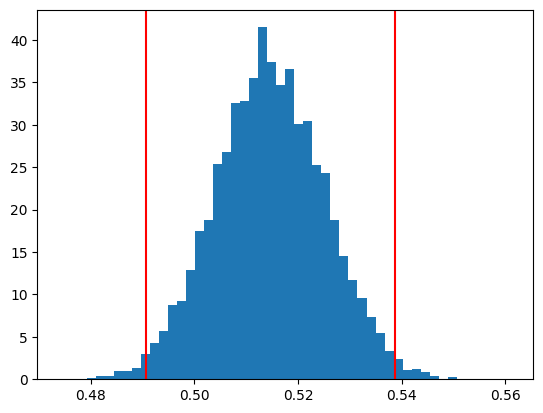

In [5]:
asset_name = "White Nile Sugar Factory power station"
asset_data = components[components["asset"] == asset_name]

plot_bootstrap(asset_data, "prisk")

Notice the width of the interval being approximately 3 times wider (despite the fact that both of them use insurance).

In [6]:
plot_risk_factors(
    base_value=asset_data["base_value"].mean(),
    capital_damages=asset_data["replacement"].mean(),
    business_disruption=asset_data["business_disruption"].mean(),
    fair_premium=asset_data["fair_insurance"].mean(),
    insurance_adjustment=asset_data["insurance_adjustment"].mean(),
    npv=asset_data["npv"].mean(),
    )

The positive insurance adjustments are due to the "build-back-better assumption".

## No insurance case
Next, we investigate the assets in case they do not have any insurance:

Width of CI:  0.0417
Mean of CI:   0.9462
Std of CI:    0.0126
Q1:           0.9247
Q99:          0.9663
Skewness:     -0.2112
Kurtosis:     0.0008


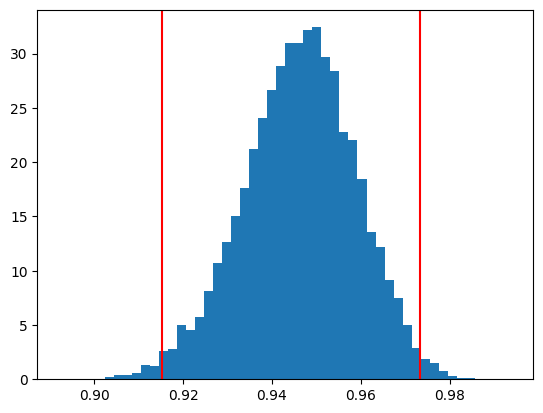

In [7]:
asset_name = "Kenana power station"
asset_data = components_uninsured[components_uninsured["asset"] == asset_name]

plot_bootstrap(asset_data, "prisk")

In [8]:
plot_risk_factors(
    base_value=asset_data["base_value"].mean(),
    capital_damages=asset_data["replacement"].mean(),
    business_disruption=asset_data["business_disruption"].mean(),
    fair_premium=asset_data["fair_insurance"].mean(),
    insurance_adjustment=asset_data["insurance_adjustment"].mean(),
    npv=asset_data["npv"].mean(),
    )

Next, we go back to the high exposure asset:

Width of CI:  0.0761
Mean of CI:   0.4615
Std of CI:    0.023
Q1:           0.4234
Q99:          0.4994
Skewness:     -0.0344
Kurtosis:     -0.0142


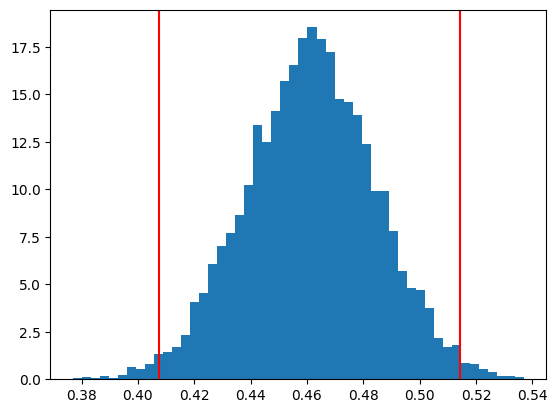

In [9]:
asset_name = "White Nile Sugar Factory power station"
asset_data = components_uninsured[components_uninsured["asset"] == asset_name]

plot_bootstrap(asset_data, "prisk")

In [10]:
plot_risk_factors(
    base_value=asset_data["base_value"].mean(),
    capital_damages=asset_data["replacement"].mean(),
    business_disruption=asset_data["business_disruption"].mean(),
    fair_premium=asset_data["fair_insurance"].mean(),
    insurance_adjustment=asset_data["insurance_adjustment"].mean(),
    npv=asset_data["npv"].mean(),
    )

## Full data analysis
After having investigated two (extreme) cases. We know turn to the analysis of the entire dataset:

Number of assets with no physical risk:  4782


replacement             0.000000
business_disruption     0.130867
fair_insurance          0.192697
insurance_adjustment   -0.057477
dtype: float64

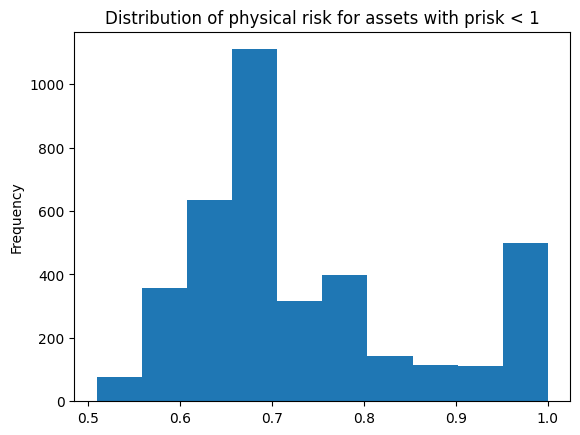

In [11]:
import matplotlib.pyplot as plt
grouped = components.groupby("asset", as_index=False).mean()

print("Number of assets with no physical risk: ", grouped[grouped["prisk"] == 1].shape[0])
with_risk = grouped[grouped["prisk"] < 1].copy()
with_risk.prisk.plot(kind="hist", title="Distribution of physical risk for assets with prisk < 1");
with_risk.replacement = with_risk.replacement/with_risk.base_value
with_risk.business_disruption = with_risk.business_disruption/with_risk.base_value
with_risk.fair_insurance = with_risk.fair_insurance/with_risk.base_value
with_risk.insurance_adjustment = with_risk.insurance_adjustment/with_risk.base_value

materialities = with_risk[["replacement", "business_disruption", "fair_insurance", "insurance_adjustment"]].mean()
materialities

Number of assets with no physical risk:  4787


replacement             0.175687
business_disruption     0.130976
fair_insurance          0.000000
insurance_adjustment    0.000000
dtype: float64

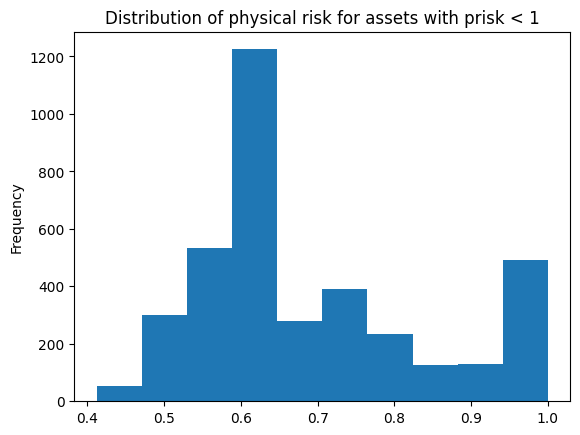

In [12]:
grouped = components_uninsured.groupby("asset", as_index=False).mean()

print("Number of assets with no physical risk: ", grouped[grouped["prisk"] == 1].shape[0])
with_risk = grouped[grouped["prisk"] < 1].copy()
with_risk.prisk.plot(kind="hist", title="Distribution of physical risk for assets with prisk < 1");
with_risk.replacement = with_risk.replacement/with_risk.base_value
with_risk.business_disruption = with_risk.business_disruption/with_risk.base_value
with_risk.fair_insurance = with_risk.fair_insurance/with_risk.base_value
with_risk.insurance_adjustment = with_risk.insurance_adjustment/with_risk.base_value

materialities = with_risk[["replacement", "business_disruption", "fair_insurance", "insurance_adjustment"]].mean()
materialities

In [13]:
power = pd.read_parquet("../../results/240617/power_with_prisk_non_insured.parquet.gzip")
power[["Type", "prisk"]].groupby("Type").mean()

,prisk
Type,
bioenergy,0.866795
coal,0.864600
nuclear,0.846315
oil/gas,0.863230


In [14]:
power[["Country", "prisk"]].groupby("Country").mean().sort_values("prisk").head(25)

,prisk
Country,
Paraguay,0.529857
French Guiana,0.582640
Côte d'Ivoire,0.620660
Guyana,0.631285
Switzerland,0.632443
Suriname,0.636652
Austria,0.652768
Bangladesh,0.654566
Sudan,0.678098


In [19]:
power[power.Country == "Thailand"]

,Value,Type,Plant / Project name,Capacity (MW),Status,Owner,Country,5,10,25,50,100,200,500,1000,prisk
662,5.132500e+07,bioenergy,Khon Kaen Sugar Power power station,30.0,operating,None,Thailand,9.34,10.15,11.61,13.28,13.57,14.11,14.81,15.19,0.525208
663,1.792575e+08,bioenergy,Mitr Biopower Chaiyaphum power station,103.0,operating,Phu Khieo Bio-Energy CO LTD,Thailand,0.43,0.55,0.66,0.72,0.79,0.85,0.91,0.98,0.943556
664,7.060250e+07,bioenergy,Mitr Biopower Dan Chang power station,41.0,operating,Dan Chang Bio-Energy CO LTD,Thailand,2.05,2.25,2.47,2.58,2.60,2.61,2.62,2.62,0.719802
665,5.483000e+07,bioenergy,Mitr Biopower Dan Chang power station,32.0,operating,Dan Chang Bio-Energy CO LTD,Thailand,2.05,2.25,2.47,2.58,2.60,2.61,2.62,2.62,0.719503
666,7.060250e+07,bioenergy,Mitr Biopower Phu Luang power station,41.0,operating,Mitr Phol Bio-Power Phu Luang CO LTD,Thailand,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16417,2.055450e+08,oil/gas,Thai Oil Company Sriracha Refinery power station,118.0,operating,Thai Oil PCL [100.0%],Thailand,2.45,3.38,4.19,4.80,5.27,5.61,5.91,6.00,0.566810
16418,1.389500e+08,oil/gas,U-Tapao Hybrid power station,80.0,pre-construction,B.Grimm Power PCL [100.0%],Thailand,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000
16419,1.400750e+09,oil/gas,U-Thai power station,800.0,operating,Gulf JP Co Ltd [100.0%],Thailand,3.86,4.01,4.25,4.61,4.90,4.99,5.18,5.26,0.615913
16421,1.200965e+09,oil/gas,Wang Noi power station,686.0,operating,Electricity Generating Authority of Thailand [...,Thailand,3.32,3.92,4.03,4.40,4.64,4.77,4.87,4.93,0.594705
